# Logistic Regression


# Case
* **Admission Decision**: You work in the admission office at a college. One of your main tasks is to review applications and decide whether to accept an applicant or not. To simplify the case, we consider two criteria only: GPA and GMAT. Furthermore, we only have two possible outcomes: Accept or Decline.
* Work with one or two students on the following tasks:
    * How do you suggest to use GPA and GMAT to determine an application? 
    * If we have a set of historical data, including the decisions of previous applications, what can we do to take advantage of this information? See the spreadsheet, MSBAAdmission.xlsx. 


## How to use SAT and GPA to determine an application? 
* Use a formula such as result = 200 * GPA + GMAT: 
    * accepted if the result >= 1050
    * declined if the result < 1050
    * **Question**: How to determine the coefficient, 200? One possible solution is to use the linear regression technique to determine the intecept and coefficients.  
    \begin{equation*}
    result = \beta_0 + \beta_1*GPA + \beta_2 * GMAT
    \end{equation*}
    * **Difficulty**: We have GPA and SAT, but we can't determine the intercept and coefficients without the values of result, which is to be determined. 
* Use GPA and GMAT of those applicants who had been accepted previously to build a model. However, the result of the above equation is numerical. What we have is **accepted** or **declined**. 
* So, the idea is to consider **accepted** and **declined** as two mutually exclusive and complementary events. And, consider the occurence of an event as one of probability. Then, what we need to do is to convert the above function in a way that it produces a probability to determine whether to accept or decline an application. 
* **Logistic regression** is one of models that can help in this case. 

## Logistic Regression
* What logistic regression does is to take a set of independent variables and their corresponding results, **accepted** or **declined**, and build a model, which produces a value between 0 and 1. 
* The model is represented by a function called **sigmoid** function, the value of which represents the probability of a set of values of IV's belonging to one class (accepted) or the other class (declined). Usually, we use 0.5 as the ``threshold``. It should be noted that the choice of the threshold may significantly affect the decision. 
* That is, if we plug one applicant's data into the model, which produces a probability greater than or equal to 0.5, then, we accept him/her. Otherwise, we decline the application. 


## Sigmoid Function with intercept and coefficients
* Logit Function: $\begin{equation*}
L =P(Y=1)= \beta_0+\beta_1 * GPA + \beta_2 * GMAT
\end{equation*}$

* Sigmoid Function: $\begin{equation*}
p = \frac{1}{1+exp^{-L}} = \frac{1}{1+exp^{-(\beta_0 + \beta_1 * GPA + \beta_2 * GMAT)}}
\end{equation*}$

* intercept: $\begin{equation*} \beta_0\end{equation*}$
* coeffficient: $\begin{equation*} \beta_1, \beta_2\end{equation*}$

In [47]:
# -- import libraries --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# -- Load dataset --
cols = ['GPA','GMAT','Result']
admission = pd.read_csv('https://raw.githubusercontent.com/ttchuang/dataset/refs/heads/master/MSBA_admission.csv',
                       usecols = cols)

admission.head(10)

,GPA,GMAT,Result
0,2.95,767,Accepted
1,2.44,710,Accepted
2,3.07,607,Accepted
3,3.77,522,Accepted
4,2.36,683,Declined
5,2.36,647,Accepted
6,3.81,707,Accepted
7,3.16,676,Accepted
8,2.17,725,Accepted
9,2.98,535,Accepted


In [49]:
# -- add labels --
# -- 0: declined --
# -- 1: accepted --
admission['Verdict']=admission['Result'].apply(lambda x: 1 if(x=='Accepted') else 0)

In [50]:
# -- Preview the data --
admission

,GPA,GMAT,Result,Verdict
0,2.95,767,Accepted,1
1,2.44,710,Accepted,1
2,3.07,607,Accepted,1
3,3.77,522,Accepted,1
4,2.36,683,Declined,0
...,...,...,...,...
995,2.33,728,Accepted,1
996,3.99,596,Accepted,1
997,3.06,494,Declined,0
998,2.09,580,Declined,0


# Admission Decision
## Problem Understanding
* How to decide an applicant's application?
* What factors should we consider? 
    - academic readiness: GPA, GMAT
    - intellectual readiness: essays
    - social readiness: extra-curricular activities
    - ...
* How those factors should be evaluated? 
* Can we build a predictive model to (semi-) automate the decision? 

## Data
* Application data consists of GPA, GMAT
* Historical data consists of GPA, GMAT and outcome

**Note:**
* Outcome is a binary classification: either ACCEPTED or DECLINED

### Acquire and review the data
* The SKLEARN.DATASETS class has built-in datasets
* The datatype of dataset in sklearn is Bunch, which has its special structure:
    * data: data of IV's or features, a NumPy array. 
    * target: data of DV's or outcomes
    * feature_names: independent variable names (column names)
    * target_names: dependent variable names
* The dataset here is randomly produced using one university's admission data. 

In [51]:
# -- Load predefined dataset --

cols = ['GPA','GMAT','Result']
admission = pd.read_csv('https://raw.githubusercontent.com/ttchuang/dataset/refs/heads/master/MSBA_admission.csv',
                       usecols = cols)

admission.head(10)

,GPA,GMAT,Result
0,2.95,767,Accepted
1,2.44,710,Accepted
2,3.07,607,Accepted
3,3.77,522,Accepted
4,2.36,683,Declined
5,2.36,647,Accepted
6,3.81,707,Accepted
7,3.16,676,Accepted
8,2.17,725,Accepted
9,2.98,535,Accepted


In [ ]:
#Lambda function is used instead of defining a seperate function becuase it will not be reused
#def convert(x):
 #   if x == 'Accepted':
  #      return 1
   # else:
    #    return 0    
#admission['Verdict'] = admission['Result'].apply(convert)
#admission.head()    

,GPA,GMAT,Result,Verdict
0,2.95,767,Accepted,1
1,2.44,710,Accepted,1
2,3.07,607,Accepted,1
3,3.77,522,Accepted,1
4,2.36,683,Declined,0


In [53]:
# -- add labels --
# -- 0: declined --
# -- 1: accepted --
admission['Verdict']=admission['Result'].apply(lambda x: 1 if(x=='Accepted') else 0)

In [54]:
admission.head()

,GPA,GMAT,Result,Verdict
0,2.95,767,Accepted,1
1,2.44,710,Accepted,1
2,3.07,607,Accepted,1
3,3.77,522,Accepted,1
4,2.36,683,Declined,0


### Examine relationships between features

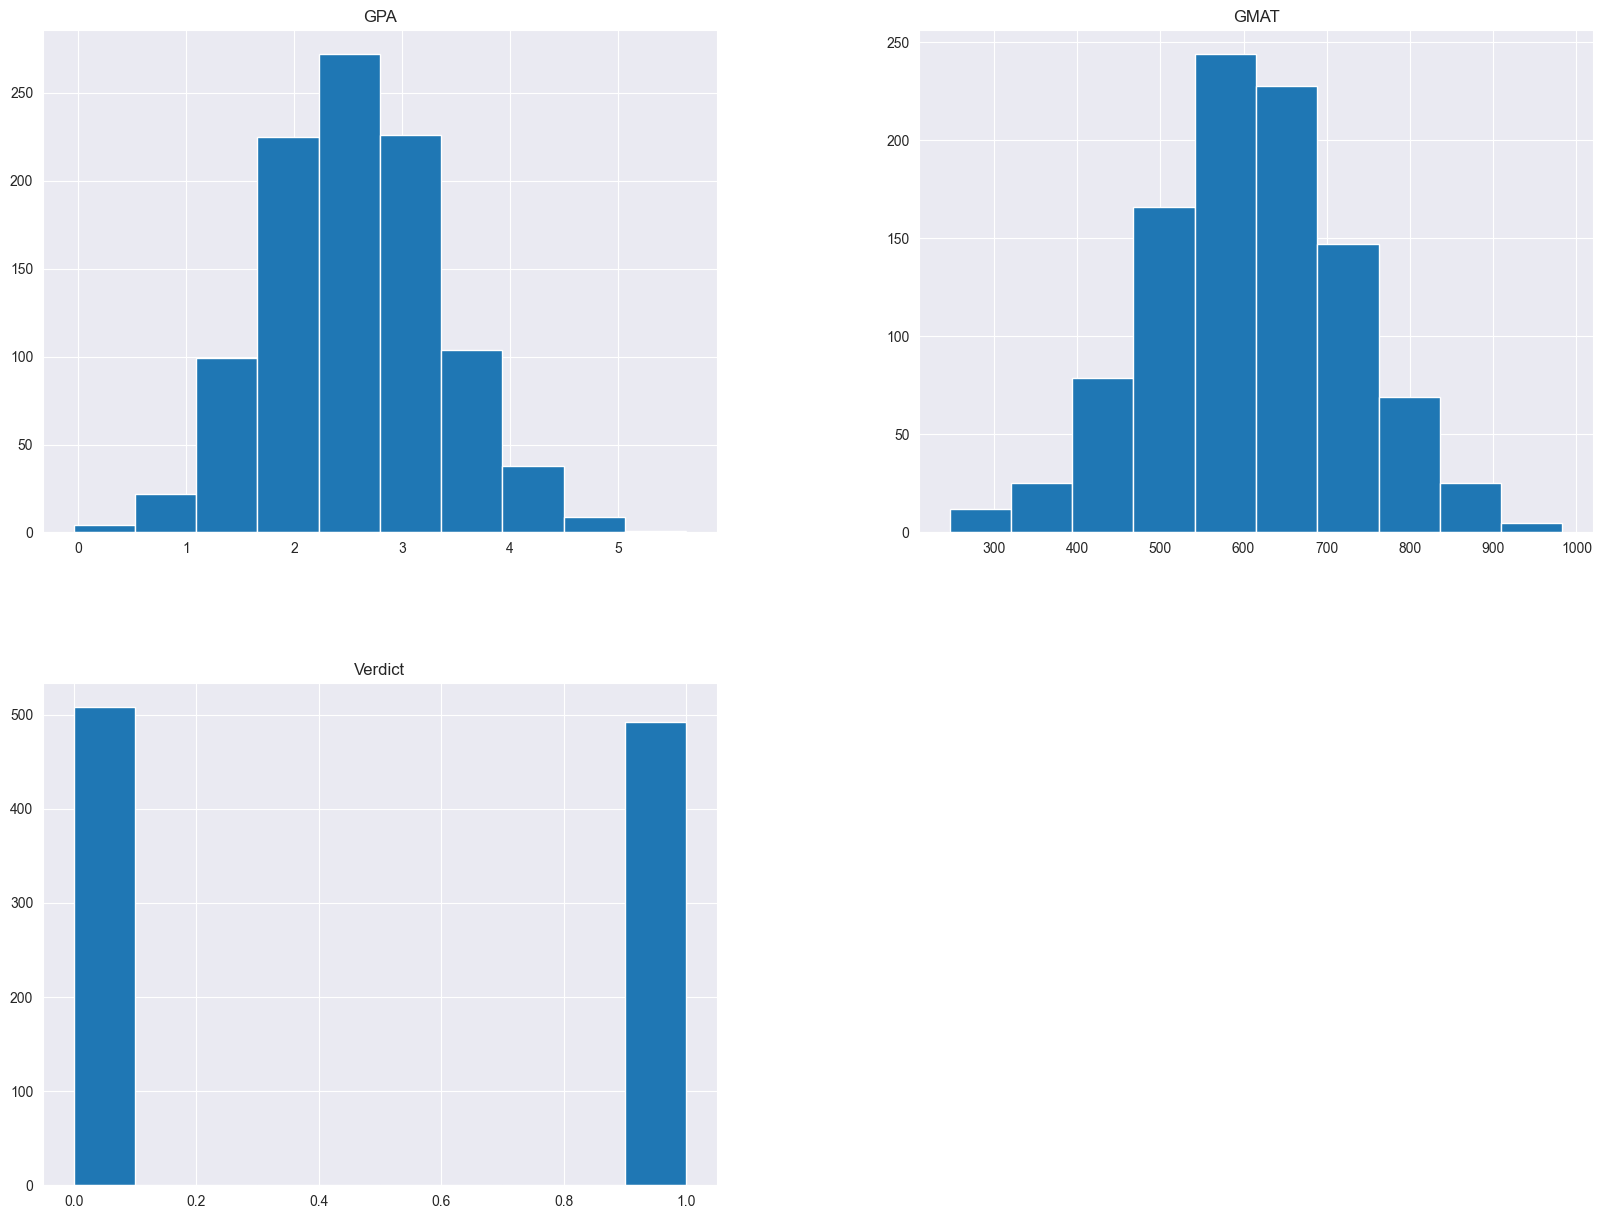

In [55]:
# -- Examine the distributin of variables --
admission[['GPA','GMAT','Verdict']].hist(bins=10,figsize=(20,15))
plt.show();

### Standardize the data

In [83]:
# -- Standardize GPA and SAT --
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
admission[['GPA','GMAT']] = scaler.fit_transform(admission[['GPA','GMAT']])

In [57]:
admission.head()

,GPA,GMAT,Result,Verdict
0,0.527337,0.706522,Accepted,1
1,0.437390,0.629076,Accepted,1
2,0.548501,0.489130,Accepted,1
3,0.671958,0.373641,Accepted,1
4,0.423280,0.592391,Declined,0


In [58]:
# -- find correlations between features --
admission[['GPA','GMAT','Verdict']].corr().style.background_gradient("Greens")

,GPA,GMAT,Verdict
GPA,1.000000,-0.040432,0.557686
GMAT,-0.040432,1.000000,0.378172
Verdict,0.557686,0.378172,1.000000


### Distribution of Cases

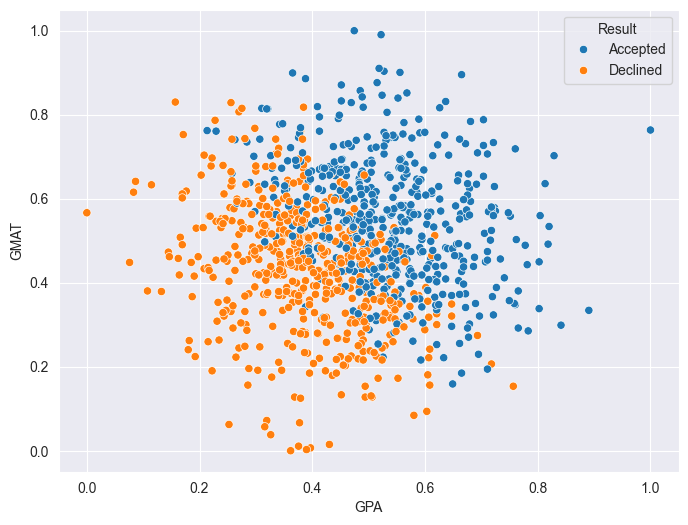

In [ ]:
# -- Use DataFrame and Seaborn --

%matplotlib inline

plt.figure(figsize=(8,6))
sns.scatterplot(x=admission['GPA'],
                y=admission['GMAT'],
                hue=admission['Result'])
plt.show();


## Modeling
### Train with Two Features
**Note:** Use the two feature, SAT and GPA, to train 

In [60]:
admission.head(10)

,GPA,GMAT,Result,Verdict
0,0.527337,0.706522,Accepted,1
1,0.437390,0.629076,Accepted,1
2,0.548501,0.489130,Accepted,1
3,0.671958,0.373641,Accepted,1
4,0.423280,0.592391,Declined,0
5,0.423280,0.543478,Accepted,1
6,0.679012,0.625000,Accepted,1
7,0.564374,0.582880,Accepted,1
8,0.389771,0.649457,Accepted,1
9,0.532628,0.391304,Accepted,1


In [61]:
# --- Split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(admission.loc[:,['GPA','GMAT']],
                                                                 admission['Verdict'],
                                                                 test_size=0.3,
                                                                 random_state = 1,
                                                                 stratify = admission['Result'])
X_train.head()

,GPA,GMAT
201,0.536155,0.408967
338,0.514991,0.415761
796,0.451499,0.426630
713,0.513228,0.616848
760,0.375661,0.745924


In [62]:
# --- Train the model ---
from sklearn.linear_model import LogisticRegression

x = X_train            # x = train_set[:,:]
y = y_train
log_regress = LogisticRegression(solver = 'liblinear') # Instantiate an object of the class

log_regress.fit(X = x, y = y) # fit the model with data

# --- Obtain and print out intercept and coefficients ---
print(log_regress.intercept_)
print(log_regress.coef_)

[-5.27568131]
[[6.86615448 4.29664543]]


##### The result above means:
* The logistic function is $\begin{align}p = \frac{1}{(1+e^{-(-5.2757+6.8661*GPA+4.2967*GMAT)})} =\frac{1}{(1+e^{(5.2757-6.8661*GPA-4.2967*GMAT)})} \end{align}$
* This function is implemented in the object, log_regress. We don't have to plug in application data. 
* Instead, we can use it to predict each application as shown below. 
* But, before we apply it to new applications, we need to test/validate it using the test dataset, X_test. 

## Plot the Logistic Curve

In [63]:
admission['L'] = -5.2757+6.8661*admission['GPA']+4.2967*admission['GMAT']
admission.head()

,GPA,GMAT,Result,Verdict,L
0,0.527337,0.706522,Accepted,1,1.380760
1,0.437390,0.629076,Accepted,1,0.430413
2,0.548501,0.489130,Accepted,1,0.592009
3,0.671958,0.373641,Accepted,1,0.943453
4,0.423280,0.592391,Declined,0,0.175913


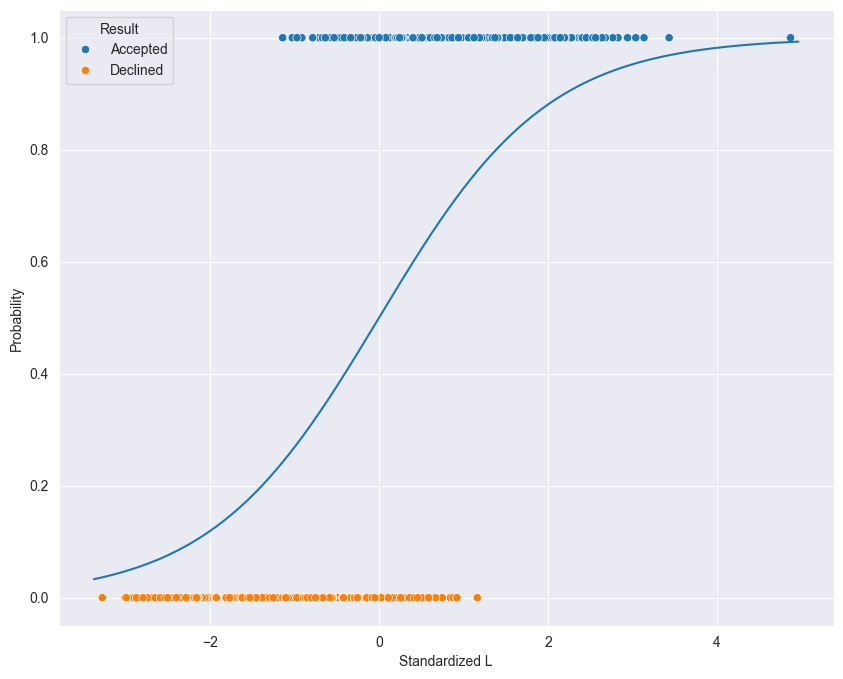

In [64]:
# -- Use DataFrame and Seaborn --

%matplotlib inline

plt.figure(figsize=(10,8))
sns.scatterplot(x=admission['L'],
                y=admission['Verdict'],
                hue=admission['Result'])

def sigmoid(x):
    return (1/(1+np.exp(-x)))

x_min = admission['L'].min()
x_max = admission['L'].max()

x = np.arange(x_min-0.1,x_max+0.1,0.02)
y = [sigmoid(n) for n in x]

plt.plot(x,y)
plt.xlabel("Standardized L")
plt.ylabel("Probability")
plt.show();


### Using 0.5 as the threshold value

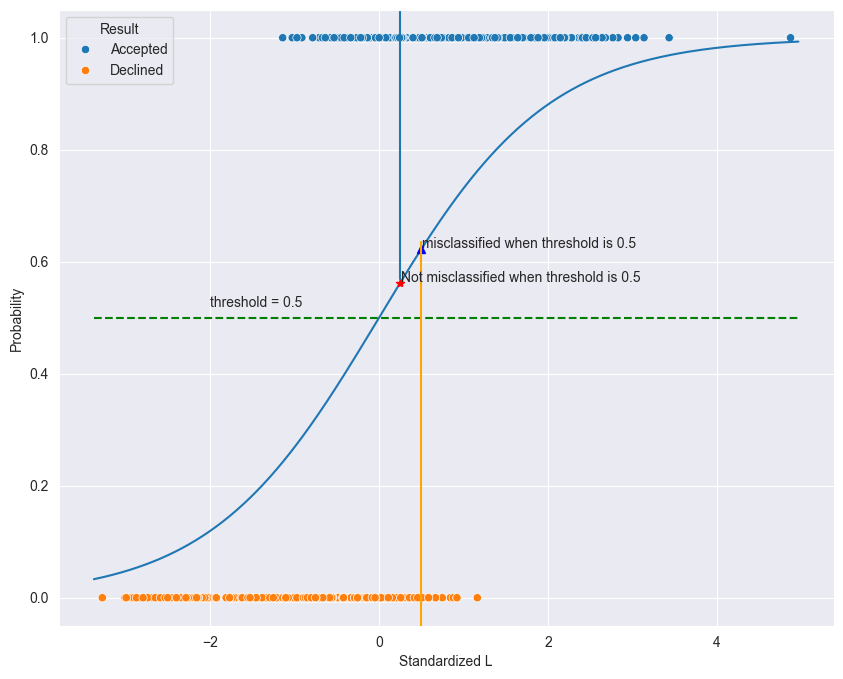

In [65]:
# -- Use DataFrame and Seaborn --

%matplotlib inline

plt.figure(figsize=(10,8))
sns.scatterplot(x=admission['L'],
                y=admission['Verdict'],
                hue=admission['Result'])

def sigmoid(x):
    return (1/(1+np.exp(-x)))

x_min = admission['L'].min()
x_max = admission['L'].max()

x = np.arange(x_min-0.1,x_max+0.1,0.02)
# y_temp = [(n-x.mean())/x.std() for n in x]
# y_temp = [(n-x.mean())/x.std() for n in x]
y = [sigmoid(n) for n in x]
plt.plot(x,y)

# -- plot the threshold line --
y_threshold = [0.5 for n in x]
plt.plot(x,y_threshold,'g--')
plt.annotate('threshold = 0.5',xy=(-2, 0.52))

# -- where the declined application with max GMAT would be clissified according to the sigmoid function --
x_declined_max = admission.loc[admission['Verdict']==0,'GMAT'].max()-220
x_accepted_min = admission.loc[admission['Verdict']==1,'GMAT'].min()+250
x_declined_max_std = ((x_declined_max-x.mean())/x.std())
x_accepted_min_std = ((x_accepted_min-x.mean())/x.std())

plt.plot(0.5,sigmoid(0.5),'b^')
plt.annotate('misclassified when threshold is 0.5',xy=(0.51,sigmoid(0.51)))


plt.plot(0.25,sigmoid(0.25),'r*')
plt.annotate('Not misclassified when threshold is 0.5',xy=(0.26,sigmoid(0.26)))


plt.axvline(0.5,
            0,
            sigmoid(0.5),
           c = 'orange')
plt.axvline(0.25,
            sigmoid(0.25),
            1,
           )

plt.xlabel("Standardized L")
plt.ylabel("Probability")
plt.show();


### Using 0.75 as the threshold value

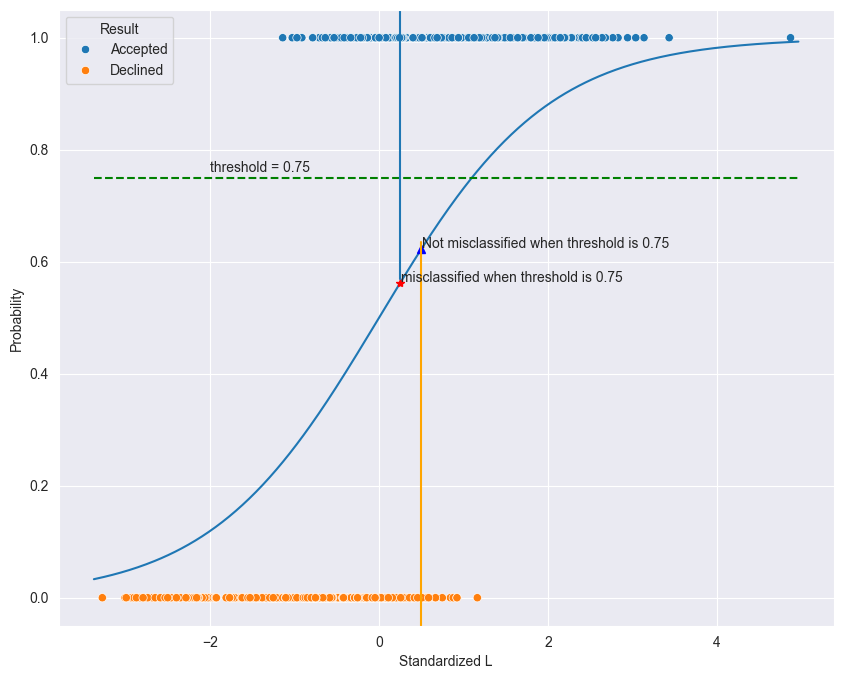

In [66]:
# -- Use DataFrame and Seaborn --

%matplotlib inline

plt.figure(figsize=(10,8))
sns.scatterplot(x=admission['L'],
                y=admission['Verdict'],
                hue=admission['Result'])

def sigmoid(x):
    return (1/(1+np.exp(-x)))

x_min = admission['L'].min()
x_max = admission['L'].max()

x = np.arange(x_min-0.1,x_max+0.1,0.02)
# y_temp = [(n-x.mean())/x.std() for n in x]
# y_temp = [(n-x.mean())/x.std() for n in x]
y = [sigmoid(n) for n in x]
plt.plot(x,y)

# -- plot the threshold line --
y_threshold = [0.75 for n in x]
plt.plot(x,y_threshold,'g--')
plt.annotate('threshold = 0.75',xy=(-2, 0.76))

# -- where the declined application with max GMAT would be clissified according to the sigmoid function --
x_declined_max = admission.loc[admission['Verdict']==0,'GMAT'].max()-220
x_accepted_min = admission.loc[admission['Verdict']==1,'GMAT'].min()+250
x_declined_max_std = ((x_declined_max-x.mean())/x.std())
x_accepted_min_std = ((x_accepted_min-x.mean())/x.std())

plt.plot(0.5,sigmoid(0.5),'b^')
plt.annotate('Not misclassified when threshold is 0.75',xy=(0.51,sigmoid(0.51)))


plt.plot(0.25,sigmoid(0.25),'r*')
plt.annotate('misclassified when threshold is 0.75',xy=(0.26,sigmoid(0.26)))


plt.axvline(0.5,
            0,
            sigmoid(0.5),
           c = 'orange')
plt.axvline(0.25,
            sigmoid(0.25),
            1,
           )

plt.xlabel("Standardized L")
plt.ylabel("Probability")
plt.show();


In [67]:
# --- Test the Model ---
test_prob = log_regress.predict_proba(X = X_test) # Use the test data, X_test, to validate the model,log_regress

preds_prob = pd.DataFrame(test_prob) # Convert the result into a dataframe

# --- Assign column names to predictions ---
preds_prob.columns = ['Declined','Accepted']
preds_prob.head()

# In the results printed below, the class (Declined vs. Accepted) that has probability greater than 0.5 "wins"
# For example, the first record shows that the probability of Accepted is 0.95 and that of Decline is 0.05. 
# Therefore, the verdict of the first record below is Accepted. 

,Declined,Accepted
0,0.883607,0.116393
1,0.328516,0.671484
2,0.300485,0.699515
3,0.353586,0.646414
4,0.536411,0.463589


In [68]:
# --- Get the predicted class labels ---
preds = log_regress.predict(X = X_test) # Use log_regress.predict() to 'predict' the test dataset, X_test

preds_class = pd.DataFrame(preds)
preds_class.columns = ['Prediction']

# --- Actual diagnosis from historical data, y_test. ---
original_result = pd.DataFrame(y_test.values) # y_test has actual results
original_result.columns = ['Original Result']

# --- Merge the three dataframes together ---
result = pd.concat([preds_prob, preds_class, original_result], axis = 1)
print(result.head())

# the results below show the prediction and the actual results. 

   Declined  Accepted  Prediction  Original Result
0  0.883607  0.116393           0                0
1  0.328516  0.671484           1                1
2  0.300485  0.699515           1                1
3  0.353586  0.646414           1                1
4  0.536411  0.463589           0                0


## Model Performance Evaluation
### Confusion Matrix

--- Confusion Matrix using matric function ---


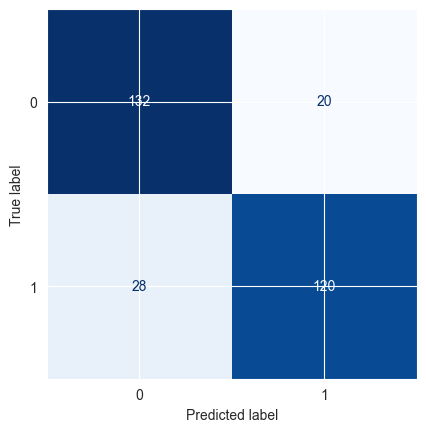

In [69]:
# --- Print Confusion Matrix using ConfusionMatrixDisplay() ---
print('--- Confusion Matrix using matric function ---')

from sklearn import metrics
metrics.ConfusionMatrixDisplay.from_estimator(log_regress,
                             X_test,
                             y_test,
                             cmap = "Blues",
                             colorbar = False)
plt.show();


--- Confusion Matrix using matric function ---


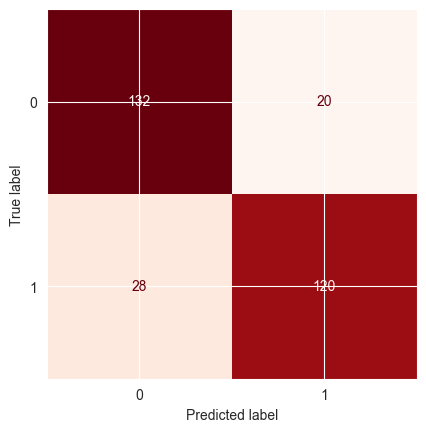

In [70]:
# --- Print Confusion Matrix using ConfusionMatrixDisplay() ---
print('--- Confusion Matrix using matric function ---')

preds_test = log_regress.predict(X_test)

metrics.ConfusionMatrixDisplay.from_predictions(y_true = y_test, 
                                               y_pred = preds_test,
                                               cmap="Reds",
                                               colorbar = False)

plt.show();


### Accuracy, Recall, Precision, and Other metrics

In [71]:
# --- Accuracy: num of correct predictions divided by the total of predictions
print('--- Accuracy ---')
print(log_regress.score(X = X_test, 
                        y = y_test))

--- Accuracy ---
0.84


In [72]:
# View summary of common classification metrics
print('--- Metrices ---')
print(metrics.classification_report(y_true = y_test, 
                                    y_pred = preds_test))

--- Metrices ---
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       152
           1       0.86      0.81      0.83       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



### Receiver Operating Characteristic (ROC) Curve
**Note:** 
* The ROC curve is created by plotting the TPR against the FPR at various thrshold settings. 
* Threshold of 0.5: all of those predicted probabilities less than or equal to 0.5 belong to one class, while those greater than 0.5 belong to another class.

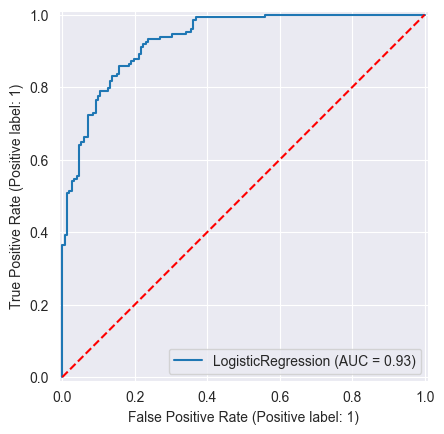

In [73]:
# -- plot the ROC curve using RocCurveDisplay --
from sklearn.metrics import RocCurveDisplay

sns.set_style('darkgrid')

RocCurveDisplay.from_estimator(log_regress, 
                               X_test,
                               y_test)
plt.plot([0,1],[0,1],'r--')
plt.show();

## Precision-Recall Curve

**Note:** 

* The Precision-Recall (PR) curve is a graphical tool used to evaluate the performance of a binary classification model by visualizing the relationship between precision and recall across various decision thresholds. It is particularly valuable for evaluating models on imbalanced datasets, where one class significantly outnumbers the other.

* **Core Metrics and Calculations**: The curve is defined by two primary metrics derived from a confusion matrix, which tracks true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN):
    * Precision (y-axis): Also known as positive predictive value, it measures the accuracy of positive predictions. It is the fraction of predicted positives that were actually correct: Precision= (TP+FP)/TP
    * Recall (x-axis): Also known as sensitivity or the true positive rate, it measures the proportion of actual positive instances that the model correctly identified. It is calculated as: Recall= (TP+FN)/TP

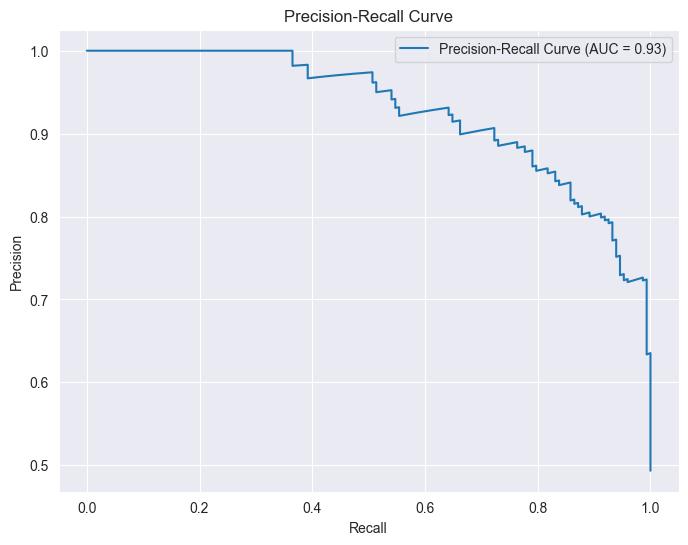

In [74]:
# -- plot the Pression Recall curve --
from sklearn.metrics import precision_recall_curve, auc

proba_test = log_regress.predict_proba(X_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test,proba_test)

auc_score = auc(recall, precision)

# -- plot --
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show();

## Prediction
* What will the model recommend if we use it to assess the following applicants? 

* Suppose we have four new applicants, we want to know how the model would review their applications? 

* [GPA, GMAT]
* [3.6, 782]
* [2.5, 750]
* [3.6, 560]
* [2.7, 564]

In [75]:
# -- place them in a dataframe --
newApp = pd.DataFrame({'GPA':[3.6,2.5,3.6,2.7],
                      'GMAT':[782,750,560,564]})
newApp

,GPA,GMAT
0,3.6,782
1,2.5,750
2,3.6,560
3,2.7,564


In [76]:
# -- The data we used to fit the model was rescaled, so we also need to rescale the new data -- 
# -- Rescale new application data --
newApp_r = scaler.transform(newApp) 

# Please be noted that we use .transform() here, 
# but we used .fit_transform() to rescale the training data before we fitted the model. 
newApp_r=pd.DataFrame(newApp_r,
                     columns = ['GPA','GMAT'])
newApp_r

,GPA,GMAT
0,0.641975,0.726902
1,0.447972,0.683424
2,0.641975,0.425272
3,0.483245,0.430707


In [77]:
# -- First applicant has 3.6 GPA and 782 GMAT --
# -- [0.6420,0.7269]
log_regress.predict(newApp_r.loc[0:0,:])

# The result is 1, which means Accepted

array([1])

In [78]:
# -- Second applicant has 2.5 GPA and 750 GMAT --
# -- [0.4480,0.6834]
log_regress.predict(newApp_r.loc[1:1,:])

# The result is 1, which means Accepted

array([1])

In [79]:
# -- Third applicant has 3.6 GPA, 560 GMAT --
# -- [0.6420, 0.4253]
log_regress.predict(newApp_r.loc[2:2,:])
# The result is 1, which means Accepted 

array([1])

In [80]:
# -- Fourth applicant has 2.7 GPA, 564 GMAT --
# -- [0.4832,0.4307]
log_regress.predict(newApp_r.loc[3:3,:])

# The result is 0, which means Declined 

array([0])

In [81]:
# -- Determine it as a group --
log_regress.predict(newApp_r)

array([1, 1, 1, 0])

In [82]:
admission['L'].describe()

count    1000.000000
mean       -0.013000
std         1.155284
min        -3.275494
25%        -0.748045
50%        -0.042540
75%         0.694112
max         4.871304
Name: L, dtype: float64